<a href="https://colab.research.google.com/github/rangaraju1/ML-Projects/blob/main/Project_02_NN_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Creating data using sklearn

In [2]:
data = make_regression(n_samples = 1000,                 #number of samples
                                      n_features = 3,            #number of features
                                      n_informative = 3,         #number of useful features

                                      random_state = 42)            #set for same data points for each run



In [3]:
type(data)

tuple

In [4]:
len(data)

2

In [5]:
X = data[0]

In [6]:
y = data[1]

In [7]:
X.shape

(1000, 3)

# Transforming Data features into Data Frames with columns Research, Salaries, Infrastructure and Expenditures

In [8]:
Research = X[:,0]

In [9]:
Salaries = X[:,1]

In [10]:
Infrastructure = X[:,2]

In [11]:
# Scale Research from 0 to 2000
Research = np.interp(Research, (Research.min(), Research.max()), (0, 2000))

In [12]:
Research

array([ 721.85725078,  469.3812216 , 1077.20384662,  883.30118835,
       1258.68382597,  632.07253378,  678.18443513,  987.61595201,
        789.13110933,  561.42161938,  968.21912167, 1286.65716066,
       1086.54839437,  774.09434828,  423.5212309 , 1416.74866013,
       1117.53730937,  856.65214553,  932.1130991 ,   49.75654065,
       1144.63252014,  809.91216603,  985.44538759,  638.01032823,
        414.65616234,  824.29204682, 1146.27515933, 1036.88766915,
       1193.57784574,  431.86479088,  235.25849443,  168.99720889,
        667.14019407,  708.61702536,  949.67510909,  819.50871959,
       1388.71170602, 1010.40770109, 1184.04456854,  564.14053841,
        965.06697712,  619.88422872, 1013.58475197,  567.09853666,
        984.58209938, 1131.70223536,  446.41949899, 1287.00514541,
        670.45124859, 1217.26647748, 1159.5525403 , 1288.9122749 ,
        786.77050433, 1281.61491381, 1076.03503762,  806.86500587,
        738.26504534,  666.02873758,  632.44425332, 1074.13311

In [13]:
Salaries = np.interp(Salaries, (Salaries.min(), Salaries.max()), (0, 1500))

In [14]:
Infrastructure = np.interp(Infrastructure, (Infrastructure.min(), Infrastructure.max()), (0, 2500))

In [15]:
y = data[1]
y.shape

(1000,)

In [16]:
y

array([-1.42338105e+02, -1.58520012e+02,  8.03345971e+01, -1.68176389e+02,
        1.81493775e+02,  1.04678329e+02,  2.02397931e+02, -1.18139772e+02,
       -9.77690126e+01,  2.89617852e+01, -3.73589172e+01,  1.20328037e+02,
        3.60634016e+01, -1.38066226e+02,  2.01625663e+02,  1.77481385e+02,
        1.78713265e+02,  1.33321395e+02,  2.77336225e+01, -2.84102770e+01,
        4.13132572e+01,  2.28608309e+02, -3.14158826e+01, -1.33728801e+01,
       -9.93324279e+01, -4.97151414e+01, -1.08320706e+02, -8.85686626e+01,
        1.96209329e+02,  3.21662512e+01,  6.22223526e+00, -9.89209172e+01,
       -1.22413703e+02, -1.82923988e+02, -1.20697452e+02,  9.07472329e+01,
       -1.27414226e+02,  1.19537688e+02, -3.93122933e+01, -1.31413437e+02,
       -7.57339501e+01, -1.17324025e+02,  1.22753511e+02, -6.08892589e+01,
       -1.14728623e+02,  2.48701884e+02,  7.90059046e+01,  1.17470775e+01,
       -9.32982666e+01,  6.98012058e+00, -1.92038211e+02,  7.29530123e+01,
       -5.28026746e+01,  

In [17]:
y = np.interp(y, (y.min(), y.max()), (6000, 20000))

In [18]:
Expenditures = y

In [19]:
df = pd.DataFrame(index = ['Research', 'Salaries','Infrastructure', 'Expenditures'],
                        data = [Research, Salaries, Infrastructure, Expenditures]).T


In [20]:
df

,Research,Salaries,Infrastructure,Expenditures
0,721.857251,613.903942,765.705784,10160.329845
1,469.381222,613.054782,795.516457,9906.531892
2,1077.203847,999.031362,892.341111,13652.741259
3,883.301188,427.943743,935.641612,9755.080727
4,1258.683826,945.261280,1371.053555,15239.327596
...,...,...,...,...
995,944.144896,662.449234,1699.288797,14085.407676
996,835.747970,637.154467,626.099384,9981.171495
997,1065.151976,646.862827,1433.367330,13213.698646
998,547.326065,900.664293,1179.932777,13274.638267


# Visualize and Inspect each feature

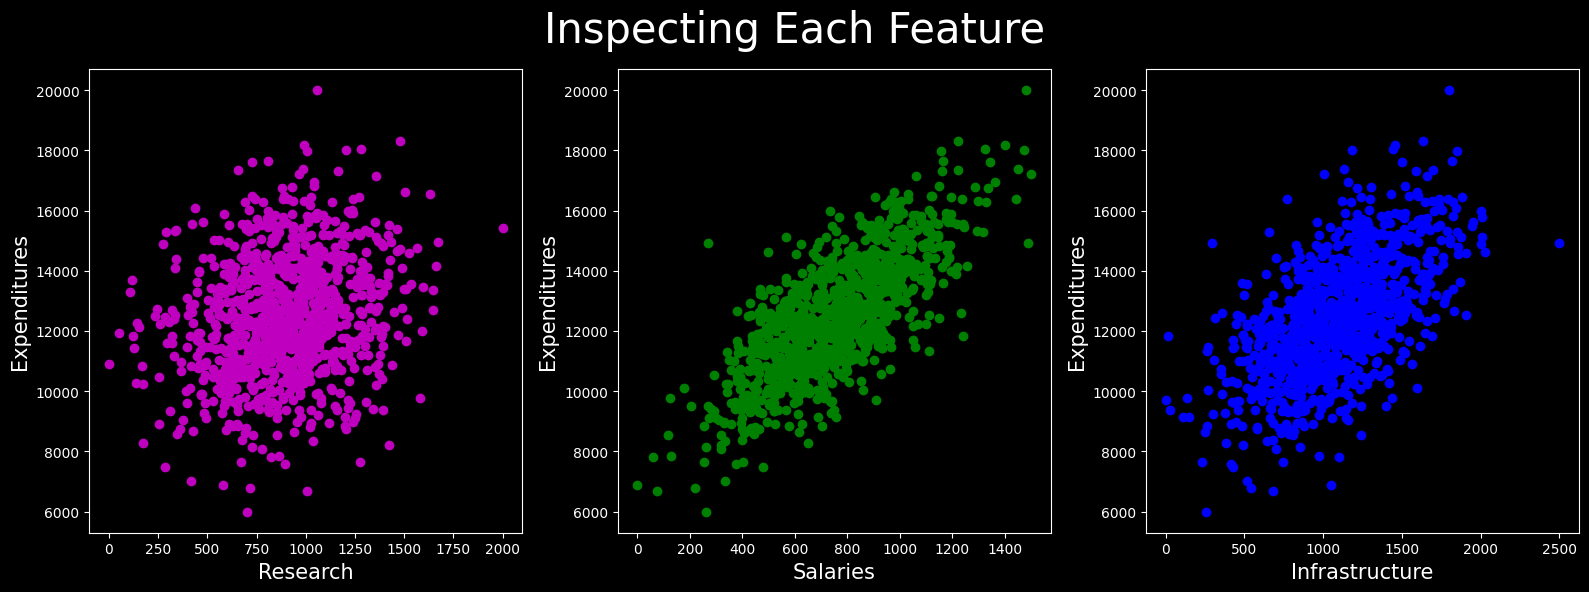

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
plt.suptitle('Inspecting Each Feature', fontsize = 30)

axes[0].plot(df['Research'],df['Expenditures'],'mo')
axes[0].set_ylabel("Expenditures", fontsize = 15)
axes[0].set_xlabel("Research", fontsize = 15)

axes[1].plot(df['Salaries'],df['Expenditures'],'go')
axes[1].set_ylabel("Expenditures", fontsize = 15)
axes[1].set_xlabel("Salaries", fontsize = 15)

axes[2].plot(df['Infrastructure'],df['Expenditures'],'bo')
axes[2].set_ylabel("Expenditures", fontsize = 15)
axes[2].set_xlabel("Infrastructure", fontsize = 15)

plt.tight_layout();

In [22]:
X = df.iloc[:,:-1].values

In [23]:
X

array([[ 721.85725078,  613.90394182,  765.70578445],
       [ 469.3812216 ,  613.05478187,  795.51645662],
       [1077.20384662,  999.03136166,  892.34111134],
       ...,
       [1065.15197636,  646.86282674, 1433.36732978],
       [ 547.32606549,  900.66429282, 1179.93277677],
       [ 600.4082175 ,  454.12205772, 1332.585463  ]])

In [24]:
y = df.iloc[:,-1].values

In [25]:
y = y.reshape(-1,1)

# Splitting data into test and train

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
X_test.shape

(200, 3)

In [28]:
X_train.shape

(800, 3)

In [29]:
y_train.shape

(800, 1)

In [30]:
X_train

array([[ 431.86479088,  865.0105837 , 1185.6421298 ],
       [ 907.18211249,  758.54914908, 1152.12367736],
       [ 823.19792766, 1176.24839757, 1248.16057742],
       ...,
       [1046.5487849 ,  697.55757397, 1669.43565893],
       [ 670.86117908,  823.93547095, 1155.09501108],
       [1298.92855652,  463.85109922, 1198.71239078]])

# Data Standardization

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Transform to Pytorch Tensors

In [32]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create Neural Network for Multiple Regression

In [33]:
model = nn.Sequential(
          nn.Linear(3,1),
)

model

Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
)

In [34]:
learningRate = 0.01
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learningRate)

In [35]:
epochs = 1001
losses = torch.zeros(epochs)

for epoch in range(epochs):
    ypred = model(X_train)
    loss = lossfunc(ypred,y_train)
    losses[epoch] = loss

    if (epoch % 100) == 0:
     print(f'epochs : {epoch} loss : {loss.detach(): 1.2f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs : 0 loss :  159732896.00
epochs : 100 loss :  2826935.00
epochs : 200 loss :  50209.20
epochs : 300 loss :  896.18
epochs : 400 loss :  16.12
epochs : 500 loss :  0.29
epochs : 600 loss :  0.01
epochs : 700 loss :  0.00
epochs : 800 loss :  0.00
epochs : 900 loss :  0.00
epochs : 1000 loss :  0.00


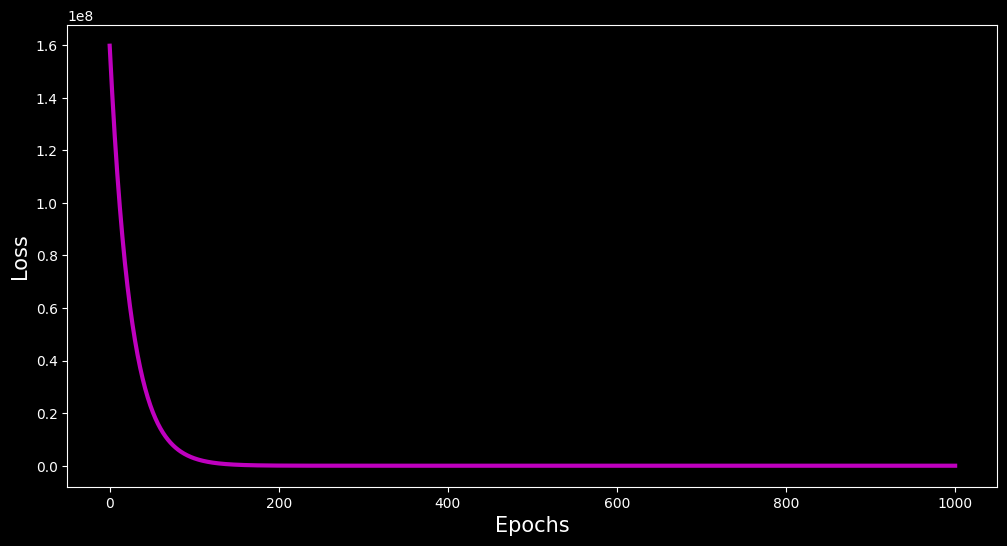

In [36]:
plt.figure(figsize =(12,6))
plt.plot(np.arange(epochs), losses.detach(), 'm', lw = 3)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

# Weight and Bias Values

In [37]:
print(model[0].weight.detach().numpy())
print(model[0].bias.detach().numpy())

[[ 409.5429 1557.3359 1229.1144]]
[12483.427]


# Testing and evaluating the model

In [38]:
y_pred = model(X_test)

In [39]:
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()

In [40]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 0.02449084605265314
MAE: 0.15486889448323493
R2: 1.0


# Further Evaluating the model

In [41]:
test_data = X_test[113,:].reshape(1,3)
test_data.shape

torch.Size([1, 3])

In [42]:
test_label = y_test[113]
test_label

array([11080.39], dtype=float32)

In [43]:
test_label = torch.tensor(test_label, dtype=torch.float32)

In [44]:
y_t = model(test_data)

In [45]:
y_t = y_t.detach().numpy()
test_label = test_label.detach().numpy()

In [46]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_label, y_t)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(test_label, y_t)))
print('R2:', metrics.r2_score(test_label, y_t))

RMSE: 0.0224609375
MAE: 0.14986973510352247
R2: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


# Sequential Method of Creating Neural Network

In [ ]:
model = nn.Sequential(
          nn.Linear(3,1),
)

model

# Creating Neural Network Using Class

In [ ]:
class NN_Reg(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer = nn.Linear(3,1)


  # Forward pass

  def forward(self,x):

  # Passing your data through the layer

    x = self.layer(x)
    return x


In [ ]:
# Create Model Instance
model2 = NN_Reg()

In [ ]:
learningRate = 0.01
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(),lr = learningRate)

In [ ]:
epochs = 1001
losses = torch.zeros(epochs)

for epoch in range(epochs):
    ypred = model2(X_train)
    loss = lossfunc(ypred,y_train)
    losses[epoch] = loss

    if (epoch % 100) == 0:
     print(f'epochs : {epoch} loss : {loss.detach(): 1.2f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs : 0 loss :  159727680.00
epochs : 100 loss :  2826833.00
epochs : 200 loss :  50207.48
epochs : 300 loss :  896.12
epochs : 400 loss :  16.12
epochs : 500 loss :  0.29
epochs : 600 loss :  0.01
epochs : 700 loss :  0.00
epochs : 800 loss :  0.00
epochs : 900 loss :  0.00
epochs : 1000 loss :  0.00


In [ ]:
y_t_2 = model2(X_test)

In [ ]:
y_t_2 = y_t_2.detach().numpy()

In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_t_2)))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_t_2)))
print('R2:', metrics.r2_score(y_test, y_t_2))

RMSE: 0.024490846
RMSE: 0.1548689
R2: 0.9999999998600717
